# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

Заказчик этого исследования — сеть отелей «Как в гостях». 

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.

Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.

<b>Бизнес-метрика и другие данные</b>

Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. 

В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 

Стоимость номеров отеля:
- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.

В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.

Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.

На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

<b> Описание данных</b>

В таблицах hotel_train и hotel_test содержатся одинаковые столбцы:

- id — номер записи;
- adults — количество взрослых постояльцев;
- arrival_date_year — год заезда;
- arrival_date_month — месяц заезда;
- arrival_date_week_number — неделя заезда;
- arrival_date_day_of_month — день заезда;
- babies — количество младенцев;
- booking_changes — количество изменений параметров заказа;
- children — количество детей от 3 до 14 лет;
- country — гражданство постояльца;
- customer_type — тип заказчика:
    - Contract — договор с юридическим лицом;
    - Group — групповой заезд;
    - Transient — не связано с договором или групповым заездом;
    - Transient-party — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- days_in_waiting_list — сколько дней заказ ожидал подтверждения;
- distribution_channel — канал дистрибуции заказа;
- is_canceled — отмена заказа;
- is_repeated_guest — признак того, что гость бронирует номер второй раз;
- lead_time — количество дней между датой бронирования и датой прибытия;
- meal — опции заказа:
    - SC — нет дополнительных опций;
    - BB — включён завтрак;
    - HB — включён завтрак и обед;
    - FB — включён завтрак, обед и ужин.
- previous_bookings_not_canceled — количество подтверждённых заказов у клиента;
- previous_cancellations — количество отменённых заказов у клиента;
- required_car_parking_spaces — необходимость места для автомобиля;
- reserved_room_type — тип забронированной комнаты;
- stays_in_weekend_nights — количество ночей в выходные дни;
- stays_in_week_nights — количество ночей в будние дни;
- total_nights — общее количество ночей;
- total_of_special_requests — количество специальных отметок.

## Описание хода работы

Шаг 1. Изучить общую информацию

Пути к файлам: 

    datasets/hotel_train.csv — данные для обучения модели.
    datasets/hotel_test.csv — данные для тестирования модели.

Шаг 2. Выполнить предобработку и исследовательский анализ данных

- Проверить данные и откорректировать их, если потребуется.
- Провести исследовательский анализ представленных данных. Описать найденные особенности: пропуски, выбросы.

Шаг 3. Вычислить бизнес-метрику

Оценить прибыль отеля без внедрения депозитов.

Шаг 4. Разработать модель ML

- Обучить разные модели и оцените их качество кросс-валидацией. Выбрать лучшую модель и проверить её на тестовой выборке. Описать выводы.
- Выбрать метрику для обучения.
- Оценить прибыль, которую принесёт выбранная модель за год.

Шаг 5. Выявить признаки «ненадёжного» клиента

На основе исследовательского анализа данных описать клиента, склонного к отказу от брони.

Шаг 6. Написать общий вывод

Описать модель, которая решает задачу с наибольшей выгодой для бизнеса. Дать бизнесу рекомендации по результатам проделанной работы.

## Настройки рабочей тетради

In [1]:
# Импорт библиотек

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

import os

In [2]:
# Настройки библиотек

 
# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

In [3]:
# Путь к директории с данными

path = 'datasets/'

###  Изучение данных

In [4]:
data_train = pd.read_csv(os.path.join(path, 'hotel_train.csv'))
data_test = pd.read_csv(os.path.join(path, 'hotel_test.csv'))

display(data_train)
data_train.info()

display(data_test)
data_test.info()

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,0,0,7.0,2015,July,27,1,0,1,1.0,0.0,0.0,BB,GBR,Direct,0,0,0,A,0,0,Transient,0,0,1
1,1,0,14.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,GBR,TA/TO,0,0,0,A,0,0,Transient,0,1,2
2,2,0,0.0,2015,July,27,1,0,2,2.0,0.0,0.0,BB,PRT,Direct,0,0,0,C,0,0,Transient,0,0,2
3,3,0,9.0,2015,July,27,1,0,2,2.0,0.0,0.0,FB,PRT,Direct,0,0,0,C,0,0,Transient,0,1,2
4,4,1,85.0,2015,July,27,1,0,3,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65224,84057,0,23.0,2016,December,53,30,2,4,2.0,0.0,0.0,BB,CHN,TA/TO,0,0,0,D,0,0,Transient,0,2,6
65225,84063,0,53.0,2016,December,53,31,2,3,2.0,0.0,0.0,HB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,3,5
65226,84094,0,7.0,2016,December,53,31,2,4,2.0,0.0,0.0,BB,FRA,TA/TO,0,0,0,D,0,0,Transient,0,1,6
65227,84117,0,17.0,2016,December,53,30,2,5,2.0,0.0,0.0,SC,FRA,TA/TO,0,0,0,A,0,0,Transient,0,1,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
0,6086,1,74.0,2017,January,1,1,1,0,2.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,0,1
1,6087,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
2,6088,1,62.0,2017,January,1,1,2,2,2.0,0.0,0.0,BB,AUT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
3,6089,1,71.0,2017,January,1,1,2,2,1.0,0.0,0.0,BB,PRT,TA/TO,0,0,0,A,0,0,Transient,0,1,4
4,6090,1,172.0,2017,January,1,1,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32407,97899,0,164.0,2017,August,35,31,2,4,2.0,0.0,0.0,BB,DEU,TA/TO,0,0,0,A,0,0,Transient,0,0,6
32408,97900,0,21.0,2017,August,35,30,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,2,7
32409,97901,0,23.0,2017,August,35,30,2,5,2.0,0.0,0.0,BB,BEL,TA/TO,0,0,0,A,0,0,Transient,0,0,7
32410,97902,0,34.0,2017,August,35,31,2,5,2.0,0.0,0.0,BB,DEU,TA/TO,0,0,0,D,0,0,Transient,0,4,7


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

### Предобработка и исследовательский анализ данных

In [5]:
#Проверка на дубликаты

print('Количество дубликатов:', data_train.duplicated().sum())

Количество дубликатов: 0


Дубликатов и пропусков нет. Для дальнейшей предобработки имеет смысл разделить столбцы на количественные и категориальные признаки, т.к. для их предобработки используются разные инструменты.

В категориальных признаках со строчными значениями имеет смысл привести все значения к нижнему регистру, удалить пробелы, затем проверить весь датафрейм на дубликаты ещё раз.

В количественных признаках возможны выбросы, которые также стоит рассмотреть.

In [6]:
#Разделение на категории

numeric = ['adults', 'babies', 'booking_changes', 'children', 'days_in_waiting_list', 'lead_time', 
           'previous_bookings_not_canceled', 'previous_cancellations', 'stays_in_weekend_nights', 'stays_in_week_nights', 
           'total_nights', 'total_of_special_requests', 'required_car_parking_spaces']

categorical = ['country', 'customer_type', 'distribution_channel', 'meal', 'reserved_room_type',  
              'arrival_date_month', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month']

rdy = ['is_canceled', 'is_repeated_guest']

In [7]:
for i in range(6):
    data_train[categorical[i]] = data_train[categorical[i]].str.lower()
    data_train[categorical[i]] = data_train[categorical[i]].str.strip()
    data_test[categorical[i]] = data_test[categorical[i]].str.strip()
    data_test[categorical[i]] = data_test[categorical[i]].str.lower()

In [8]:
data_train.duplicated().sum()

0

Т.к. далее будет исследование на выбросы в данных, полезно знать, сколько отмененных заказов было всего, т.к. это целевой признак который будет предсказывать модель и будет плохо, если мы выкинем половину значений отмененных заказов, т.к. посчитаем их выбросами из-за других признаков в строке.

In [9]:
print('Количество отмененных заказов равно', data_train.loc[data_train['is_canceled'] == 1]['id'].count())

Количество отмененных заказов равно 24044


Отмененных заказов довольно много, немного меньше половины, что даёт нам возможность не особо беспокоиться о том, что случайно можем выкинуть большую часть отменненых заказов.

Далее выбросы будем искать так: сначала рассмотрим те столбцы, в которых мало уникальных значений, потому что найти выбросы в них можно вручную, без применения инструментов анализа, что упростит задачу, т.к. мы имеем довольно много количественных признаков. Далее рассмотрим остальные столбцы, построим гистограммы распределения и изучим информацию о квартилях в них.

In [10]:
big_numeric = []
for value in numeric:
    if len(data_train[value].unique()) <= 10:
        print(value, len(data_train[value].unique()))
        print(data_train[value].unique())
    else:
        big_numeric.append(value)
        
print('Столбцы с большим количеством разных значений:', big_numeric)

adults 5
[1. 2. 3. 4. 0.]
babies 5
[ 0.  1.  2. 10.  9.]
children 4
[0. 1. 2. 3.]
stays_in_weekend_nights 5
[0 2 1 4 3]
stays_in_week_nights 7
[1 2 3 4 5 6 0]
total_nights 10
[ 1  2  3  4  6  7  5  8 10  9]
total_of_special_requests 6
[0 1 3 2 4 5]
required_car_parking_spaces 4
[0 1 2 3]
Столбцы с большим количеством разных значений: ['booking_changes', 'days_in_waiting_list', 'lead_time', 'previous_bookings_not_canceled', 'previous_cancellations']


In [11]:
print('Количество заказов с указанным количеством детей больше 2:', data_train.loc[data_train['babies'] > 2]['id'].count())

Количество заказов с указанным количеством детей больше 2: 2


Из просмотренных столбцов выбросы найдены только в столбце "babies". Столбцы с большим количеством уникальных значений будем исследовать дальше.

Стоит уточнить, что мы ищем выбросы и нам мало интересны значения больше или равные единице в исследуемых далее столбцах, т.к. это вполне логично, что подавляющее большинство не делало никаких изменений или делали одно изменение в заказах или отменяло их, а значения, больше или равные единице, затруднят исследования графиков и поиск выбросов, т.к. из-за них распределение будет сильно скошено влево.

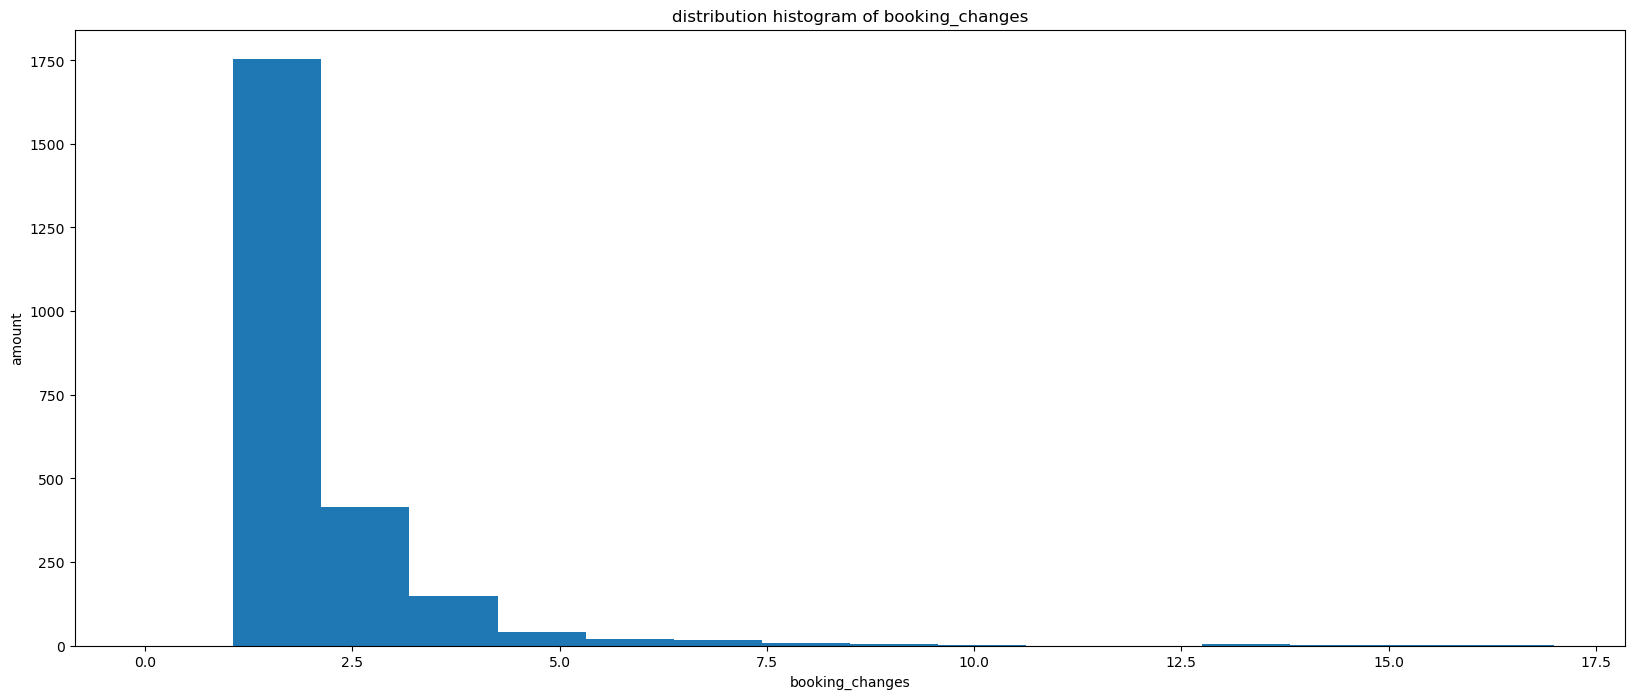

count    2419.000000
mean        2.503927
std         1.234115
min         2.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        17.000000
Name: booking_changes, dtype: float64


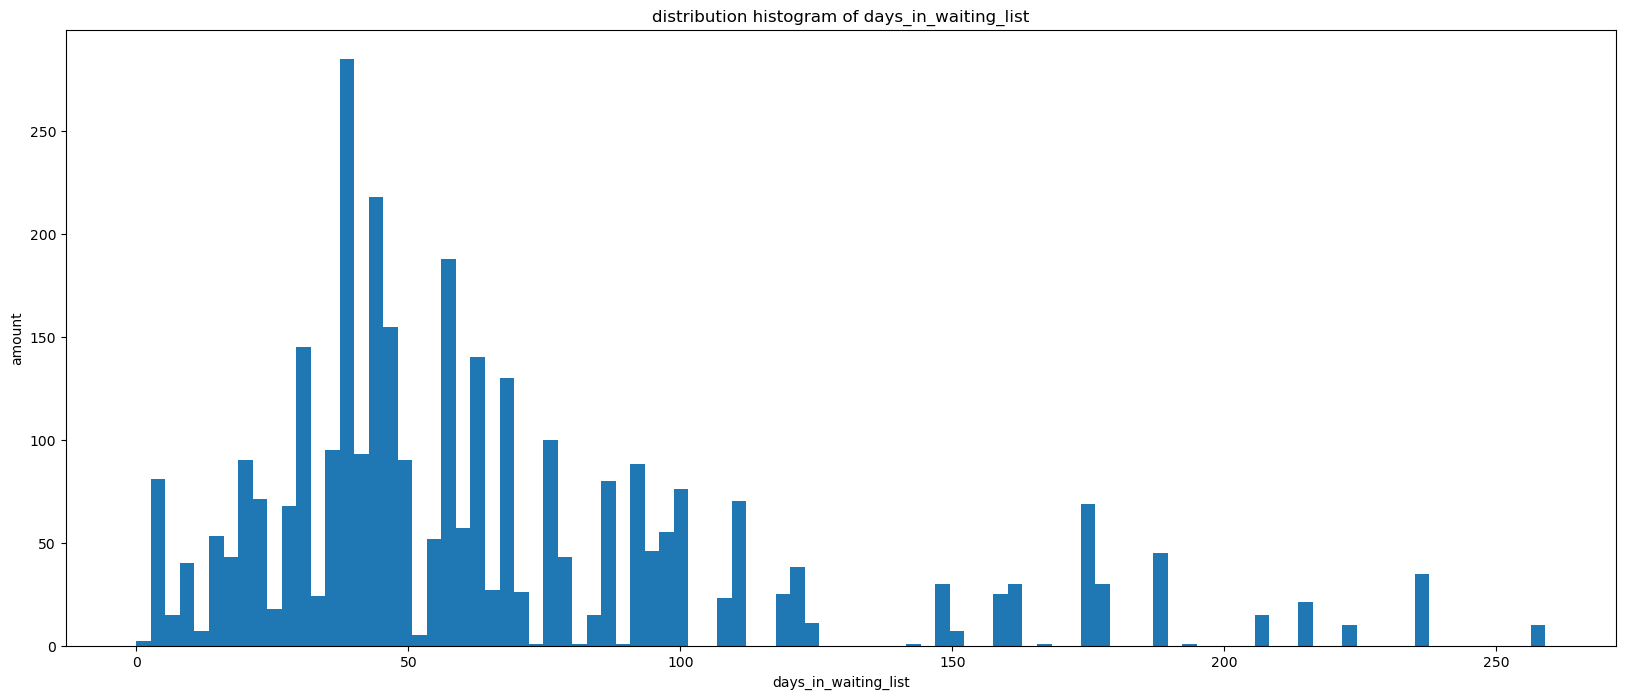

count    3221.000000
mean       67.524992
std        49.024481
min         2.000000
25%        38.000000
50%        56.000000
75%        87.000000
max       259.000000
Name: days_in_waiting_list, dtype: float64


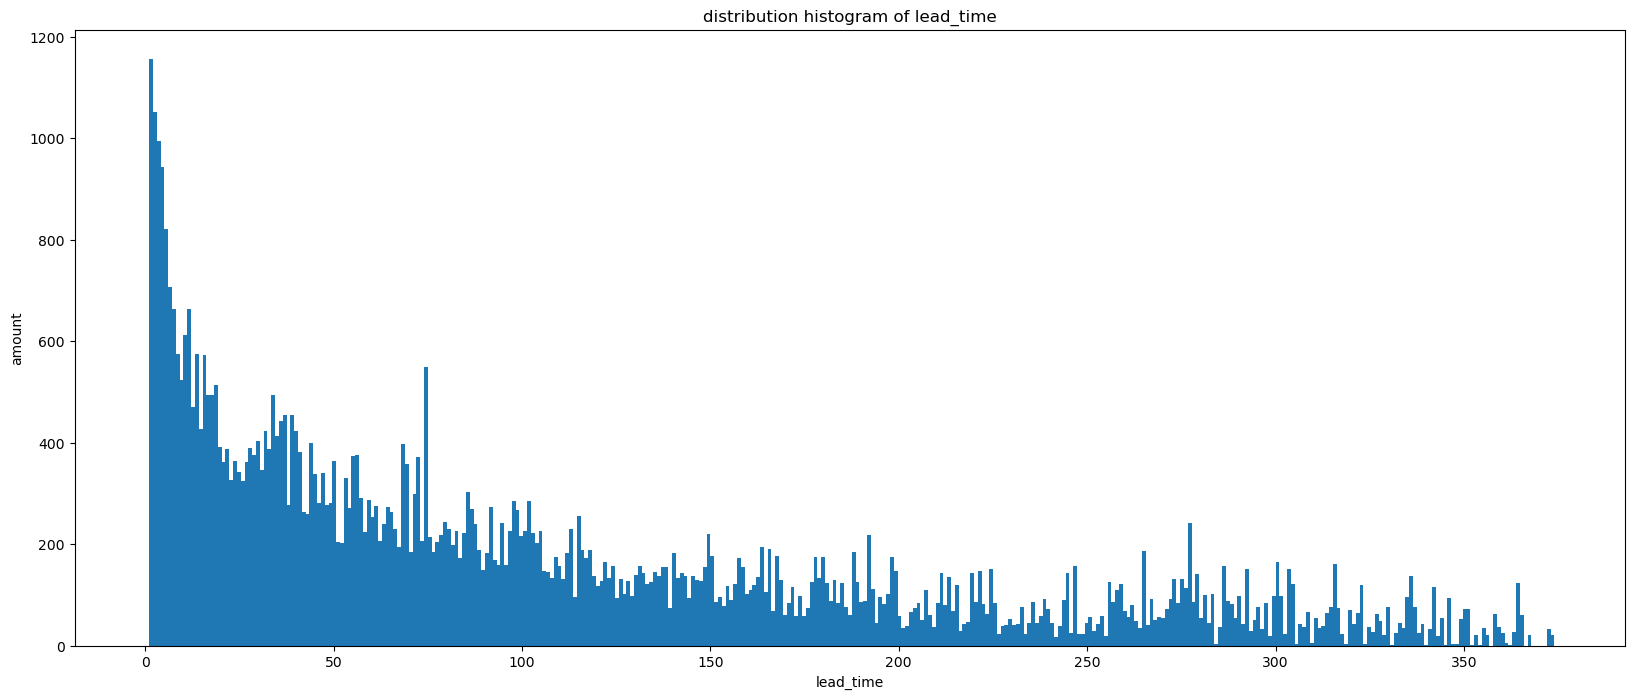

count    59822.000000
mean       105.012236
std         95.749450
min          2.000000
25%         27.000000
50%         74.000000
75%        163.000000
max        374.000000
Name: lead_time, dtype: float64


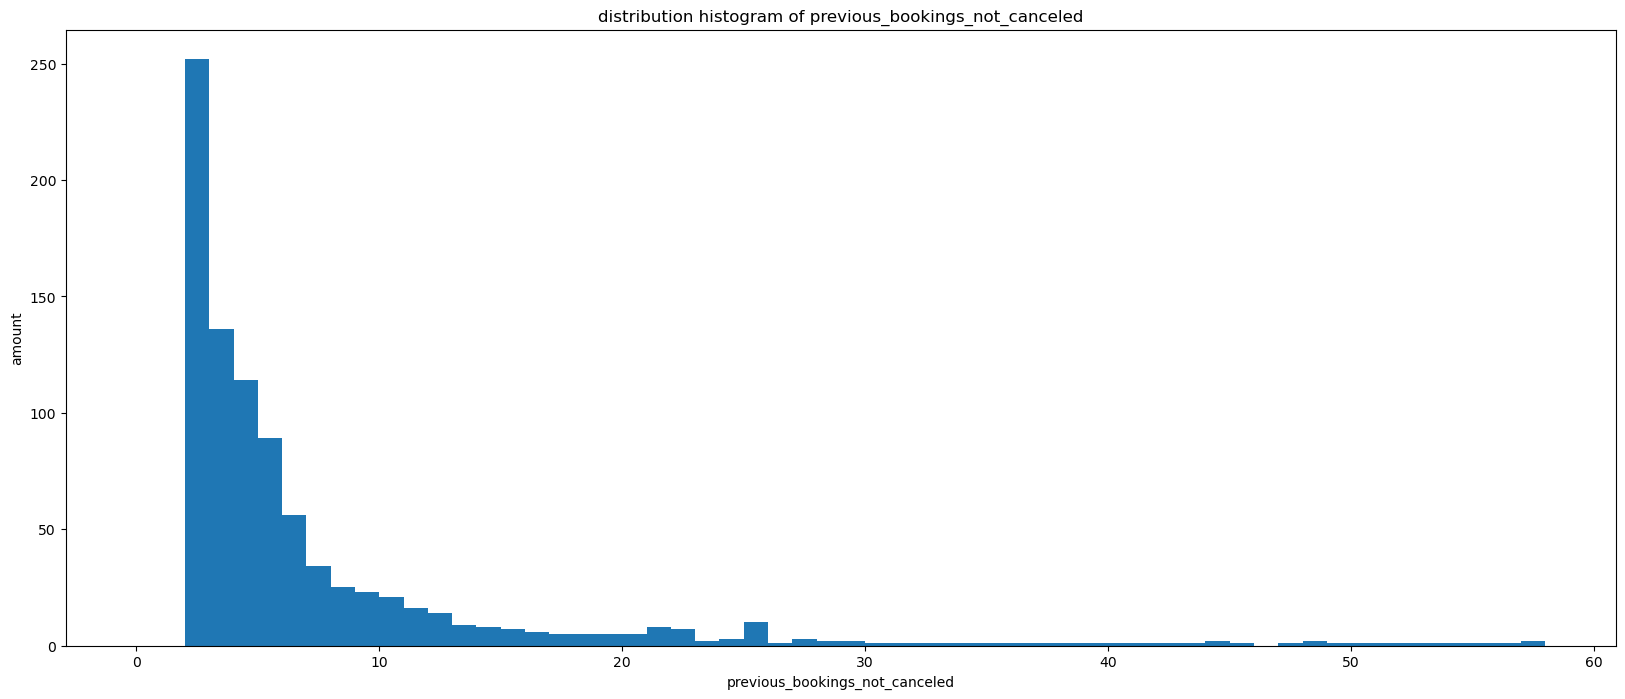

count    898.000000
mean       7.105791
std        8.806666
min        2.000000
25%        2.000000
50%        4.000000
75%        7.000000
max       58.000000
Name: previous_bookings_not_canceled, dtype: float64


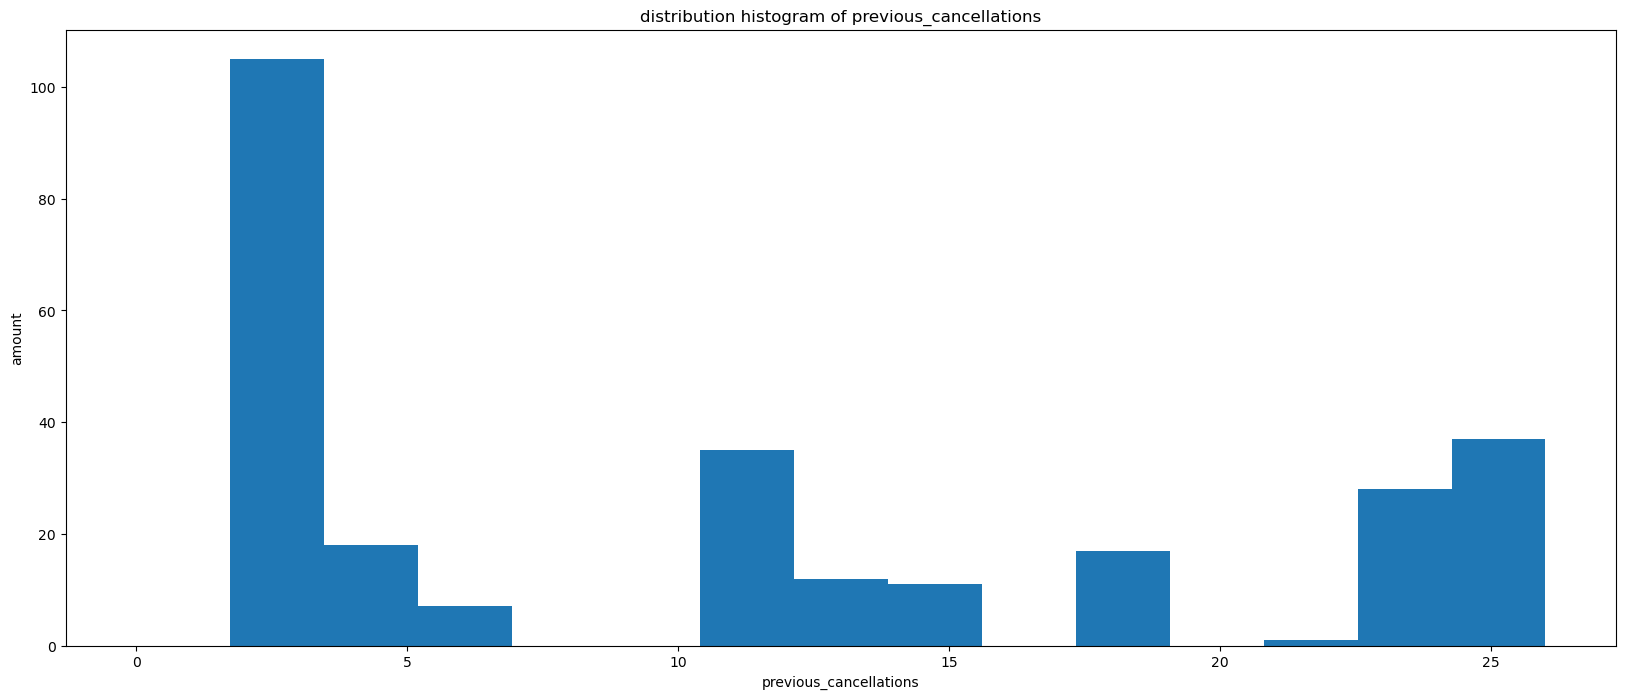

count    271.000000
mean      11.225092
std        9.098895
min        2.000000
25%        3.000000
50%       11.000000
75%       19.000000
max       26.000000
Name: previous_cancellations, dtype: float64


In [12]:
#Строим гистограммы распределения и выводим подробную информацию.

for_describe = []
for value in big_numeric:
    plt.figure(figsize=(20, 8))
    plt.hist(data_train.loc[data_train[value]>1][value], range=(0, data_train[value].max()), bins=len(data_train[value].unique()))
    plt.gca().set(title='distribution histogram of '+value, ylabel='amount', xlabel=value)
    plt.show()
    for_describe.append((data_train.loc[data_train[value]>1][value].describe()))
    print((data_train.loc[data_train[value]>1][value].describe()))

Гистограмма распределения признака изменений в заказе: гистограмма получилась сильно скошенной влево, но с коротким и маловесящим хвостом, что вполне даёт нам право посчитать выбросы стандартным образом: значения, которые находятся на расстоянии больше полутора третьего квартиля от медианы, считаются выбросами

Гистограмма распределения признака дней ожидания: распределение на гистограмме нормальное, что также позволяет нам использовать межквартильный метод для поиска выбросов.

Гистограмма распределения признака количества дней между датой бронирования и прибытия: распределение сильно скошено влево и имеет сильнозначимый хвост, для поиска выбросов с помощью межквартильного метода придется повысить коэффициент умножения расстояния с 1.5 до 2.2, чтобы выбросами посчитались не слишком большое количество значений.

Гистограмма распределения признака количества подтверждённых заказов у клиента: аналогично первому - сильный перекос влево, но малозначимый хвост

Гистограмма распределения признака предыдущих отмен заказа: если считать по стандартному способу с помощью межквартильного метода, то можно сказать, что выбросов нет. Однако стоит отметить, что до 20 отмен наблюдается спад, а потом резко количество значений возрастает, что весьма странно.

In [13]:
#Удаление выбросов

data_train_new = data_train.drop(data_train.loc[data_train['babies'] > 2].index, axis=0)

for_describe.pop(big_numeric.index('lead_time'))
big_numeric.remove('lead_time')

data_train_new = data_train_new.drop(list(data_train_new.loc[data_train_new['lead_time'] > round(data_train_new['lead_time'].describe()[6]*2.2)].index), axis=0)

for i in range(len(for_describe)):
    data_train_new = data_train_new.drop(list(data_train_new.loc[data_train_new[big_numeric[i]] > round(for_describe[i][6]*1.5)].index), axis=0)
    
print('Удалено', 100-data_train_new['adults'].count()/data_train['id'].count()*100, '% данных')


Удалено 3.087583743427004 % данных


### Подсчёт прибыли до внедрения модели

Необходимо оценить прибыль отеля без внедрения депозитов. Т.к. нам далее потребуется ещё раз посчитать выручку, но уже с депозитом, то наиболее удобно будет написать функцию для расчета прибыли.

In [14]:
def profit(data, deposit=0):
    
    if data['arrival_date_month'] in ['july', 'august', 'june']:
        season_coeff = 1.4
    elif data['arrival_date_month'] in ['september', 'october', 'november', 'march', 'april', 'may']:
        season_coeff = 1.2
    else:
        season_coeff = 1
    
    category = data['reserved_room_type']
    if category == 'a':
        room_cost = 1000
        room_service = 400
    elif category == 'b':
        room_cost = 800
        room_service = 350
    elif category == 'c':
        room_cost = 600
        room_service = 350
    elif category == 'd':
        room_cost = 550
        room_service = 150
    elif category == 'e':
        room_cost = 500
        room_service = 150
    elif category == 'f':
        room_cost = 450
        room_service = 150
    elif category == 'g':
        room_cost = 350
        room_service = 150
        
    if deposit == 1:
        predict = data['predictions']
        if predict == 0:
            if data['is_canceled'] == 0:
                profit = data['total_nights']*room_cost*season_coeff - room_service*np.ceil(data['total_nights']/2)
            else: 
                profit = -1*room_service
        elif predict == 1:
            if data['is_canceled'] == 0:
                profit = (0.8*(room_cost+room_service) + (data['total_nights']-1)*room_cost*season_coeff 
                          - room_service*np.ceil(data['total_nights']/2))
            else:
                profit = 0.8*(room_cost+room_service)-room_service
    else:
        if data['is_canceled'] == 0:
            profit = data['total_nights']*room_cost*season_coeff - room_service*np.ceil(data['total_nights']/2)
        else:
            profit = -1*room_service
            
    data['profit'] = profit
            
    return data

In [15]:
sum = data_train.apply(profit, axis=1)['profit'].sum()
    
print('Прибыль отеля за исследуемый период равна', sum)

Прибыль отеля за исследуемый период равна 99085820.0


### Разработка модели ML

In [16]:
#Удаление незначимых для обучения столбцов из данных

data_train_new = data_train_new.drop('id', axis=1)
data_test = data_test.drop('id', axis=1)

In [17]:
k = data_test['adults'].count()/(data_train['adults'].count()+data_test['adults'].count())

data = pd.concat([data_train_new, data_test], axis=0, ignore_index=True)
data_ohe = pd.get_dummies(data, drop_first=True)

data_train_ohe, data_test_ohe = train_test_split(data_ohe.copy(), test_size=k, random_state=12345)

features = data_train_ohe.drop('is_canceled', axis=1)
target = data_train_ohe['is_canceled']

features_test = data_test_ohe.drop('is_canceled', axis=1).copy()
target_test = data_test_ohe['is_canceled']

#Чтобы обучить scaler только на тренировочных данных
features_train, features_valid, target_train, target_valid = train_test_split(features.copy(), target, test_size=0.3, random_state=12345)

scaler = StandardScaler()

scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

features = pd.concat([features_train, features_valid], axis=0)

После подготовки данных будем искать наиболее результативную модель из известных видов с помощью перебора гиперпараметров.

Рассчитывать будем сразу три метрики: средняя оценка по результатам кросс-валидации, f1 лучшей модели и AUC-ROC, а потом уже оценивать.

In [18]:
# Дерево решений

best_result_tree = 0
best_depth_tree = 0
best_model_tree = None
for depth in range(1, 16):
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    scores = cross_validate(model_tree, features, target, cv=5)['test_score']
    result = scores.sum()/len(list(scores))
    if result > best_result_tree:
        best_result_tree = result
        best_depth = depth
        best_model_tree = model_tree
        
print('Лучшая средняя оценка по результатам кросс-валидации равна', best_result_tree, 'у дерева с глубиной', best_depth)

best_model_tree.fit(features_train, target_train)
predictions = best_model_tree.predict(features_valid)
result_f1 = f1_score(target_valid, predictions)
print('F1 лучшей модели дерева решений:', result_f1)

probabilities_valid = best_model_tree.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC равна:', auc_roc)

Лучшая средняя оценка по результатам кросс-валидации равна 0.6313886332717942 у дерева с глубиной 1
F1 лучшей модели дерева решений: 0.5785615491009681
AUC-ROC равна: 0.663321085609858


In [19]:
#Случайный лес

best_result_forest = 0
best_depth_forest = 0
best_est_forest = 0
best_model_forest = None
for est in range(10, 101, 10):
    for depth in range(1, 13):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        scores = cross_validate(model_forest, features, target, cv=5)['test_score']
        result = scores.sum()/len(list(scores))
        if result > best_result_forest:
            best_result_forest = result
            best_depth_forest = depth
            best_est_forest = est
            best_model_forest = model_forest

print('Лучшая средняя оценка по результатам кросс-валидации равна', best_result_forest, 
      'у случайного леса с количеством деревьев равным', best_est_forest, 'и глубиной равной', best_depth_forest)

best_model_forest.fit(features_train, target_train)
predictions = best_model_forest.predict(features_valid)
result_f1 = f1_score(target_valid, predictions)
print('F1 лучшей модели cлучайного леса:', result_f1)

probabilities_valid = best_model_forest.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC равна:', auc_roc)

Лучшая средняя оценка по результатам кросс-валидации равна 0.631404287623704 у случайного леса с количеством деревьев равным 10 и глубиной равной 3
F1 лучшей модели cлучайного леса: 0.5062351849943316
AUC-ROC равна: 0.8161580562073668


In [20]:
#

model_linear = LogisticRegression(solver='liblinear', random_state=12345)
scores = cross_validate(model_linear, features, target, cv=5)['test_score']
result = scores.sum()/len(list(scores))

print('Средняя оценка по результатам кросс-валидации равна', result)

model_linear.fit(features_train, target_train)
predictions = model_linear.predict(features_valid)
result_f1 = f1_score(target_valid, predictions)
print('F1 лучшей модели логистической регрессии:', result_f1)

probabilities_valid = model_linear.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('AUC-ROC равна:', auc_roc)

Средняя оценка по результатам кросс-валидации равна 0.6313886332717942
F1 лучшей модели логистической регрессии: 0.6758631562352199
AUC-ROC равна: 0.8501155700842933


Модель логистической регрессии выигрывает по всем метрикам у других моделей, поэтому её и будем использовать в дальнейшем.

In [21]:
#Оценка прибыли, которую могла бы принести модель на тестовых данных

predictions = model_linear.predict(features_test)

for_profit = data.loc[data_test_ohe.index]
for_profit['predictions'] = predictions

profit_without_deposit = for_profit.apply(profit, axis=1)['profit'].sum()
profit_with_deposit = for_profit.apply(profit, axis=1, deposit=1)['profit'].sum()

print('Разница между прибылью с предсказаниями модели и без предсказаний равна:', profit_with_deposit-profit_without_deposit)

Разница между прибылью с предсказаниями модели и без предсказаний равна: 7223770.0


<b>Вывод</b>

- 1) Модель логистической регрессии показывает наилучшие результаты среди других моделей
- 2) За исследуемые восемь месяцев, которые представлены в тестовых данных, с введением модели и системы депозитов, модель могла бы принести бизнесу 6.5 млн, тогда в перспективе за год будет около 9 млн, т.е. модель окупает себя за пару месяцев

###  Портрет «ненадёжного» клиента

"Ненадежный клиент" - клиент, который отменяет заказ, значит нам интересен признак "is_canceled". Рассмотрим его корреляцию с остальными признаками, тогда узнаем, что больше всего характеризует такого клиента.

In [22]:
data_train.corr()['is_canceled'].sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.328142
previous_cancellations            0.153023
days_in_waiting_list              0.075848
adults                            0.045153
arrival_date_week_number          0.012869
stays_in_week_nights              0.010650
total_nights                      0.001542
arrival_date_day_of_month        -0.001903
stays_in_weekend_nights          -0.013767
children                         -0.017746
babies                           -0.029589
arrival_date_year                -0.030835
is_repeated_guest                -0.040242
previous_bookings_not_canceled   -0.045557
booking_changes                  -0.142935
required_car_parking_spaces      -0.186486
id                               -0.241910
total_of_special_requests        -0.257061
Name: is_canceled, dtype: float64

<b>Вывод</b>

Исходя из корреляции, можно сказать, что вероятность отмены заказа клиентом прямо пропорцианально зависит от количества дней между датой бронирования и датой прибытия, и количества отменённых заказов. Зависит обратно пропорцианально от количества изменений параметров заказа, необходимости места для автомобиля и количества специальных отметок.

То есть ненадежный клиент для бизнеса тот, который имеет много времени между датой бронирования и прибытием  и имеет немалое количество уже отмененных заказов. Также ненадежные клиенты меньше вносят изменений в параметры заказа, меньше добавляют специальных отметок к заказу и у них немного меньше необходимость в месте для автомобиля.

### Общий вывод

Исходя из проделанного исследования, можно сказать что модель логистической регрессии наиболее подходящая для данной задачи: эта модель показывает довольно высокую точность (судя по метрике F1-меры) и высокое качество (судя по метрике AUC-ROC). Кроме того, такая модель, вместе с введением системы депозитов, может увеличить прибыль исследуемого бизнеса примерно на 8-10%.

Бизнесу следует учесть, что вероятность отмены заказа клиентом зависит прямо пропорцианально от количества дней между датой бронирования и датой прибытия, и от количества отменённых заказов; и обратно пропорцианально от количества изменений параметров заказа, от необходимости места для автомобиля и от количества специальных отметок. И как-то обратить внимание на эти факторы для уменьшения количества отменяемых заказов.